In [1]:
# 3D Medical Imaging: Milestone 2

In [60]:
from torch.utils.data.dataset import Dataset
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [61]:
class NiftiDataset(Dataset):
    def __init__(self, source_dir, target_dir, transforms):
        # fill this in
        self.source_dir = source_dir
        self.target_dir = target_dir
        self.transforms = transforms
        
        # 
        self.source_images = [f for f in os.listdir(source_dir)]
        self.target_images = [f for f in os.listdir(target_dir)]

    def __len__(self):
        # fill this in
        return len(self.source_images)

    def __getitem__(self, idx):
        # fill this in
        
        source_path = os.path.join(self.source_dir, self.source_images[idx])
        target_path = os.path.join(self.target_dir, self.target_images[idx])
        
        t1_image = nib.load(t1_image_path)
        t1_image_data = t1_image.get_fdata()
        t1_slice_0 = t1_image_data[26, :, :]

        t2_image = nib.load(t2_image_path)
        t2_image_data = t2_image.get_fdata()     
        t2_slice_0 = t2_image_data[26, :, :]
        
        image_pair = (t1_slice_0, t2_slice_0)
        
        transform_pair = None
        if self.transforms:
            for i, tsform in enumerate(self.transforms):
                transform_pair = tsform(image_pair)
        
        return transform_pair

class RandomCrop3D:
    def __init__(self, args):
        # fill this in
        self.output_size = args["output_size"]

    def __call__(self, sample):
        # fill this in
        # we will also need to create a function that extracts a patch, 
        # i.e., a subset of the image, from both the source and target images at the same location.
        
        # Extract pair from tuple
        image_1 = sample[0]
        image_2 = sample[1]
        
        #print("*1",image_1.shape)
        #*1 (120, 90)
        
        # Randomly generate patch
        h, w = image_1.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)
        
        # Crop images
        image_1_cropped = image_1[top: top + new_h, left: left + new_w]        
        image_2_cropped = image_2[top: top + new_h, left: left + new_w]        

        return (image_1_cropped, image_2_cropped)

In [62]:
def show_slices(slices):
    
    list_slices = list(slices)
    
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(list_slices))
    for i, slice in enumerate(list_slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [63]:
# Test
t1_dir_path = "/Users/a200005921/PROJECTS_DEV/LEARNING/MANNING_3D_MEDICAL/data/small/t1"
t2_dir_path = "/Users/a200005921/PROJECTS_DEV/LEARNING/MANNING_3D_MEDICAL/data/small/t2"

output_size = [75,75]

args = {}
args["output_size"] = output_size

transforms = [ RandomCrop3D(args) ]

In [64]:
my_dataset = NiftiDataset(source_dir=t1_dir_path, target_dir=t2_dir_path, transforms=transforms)

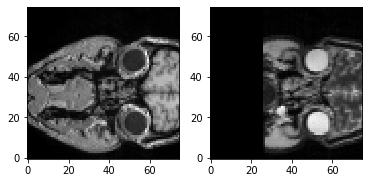

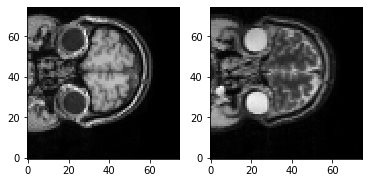

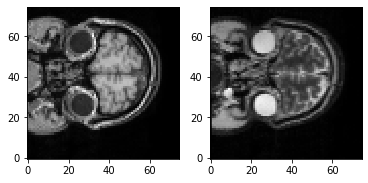

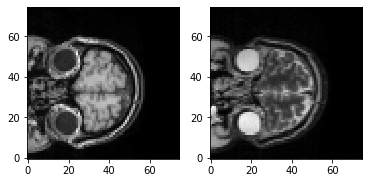

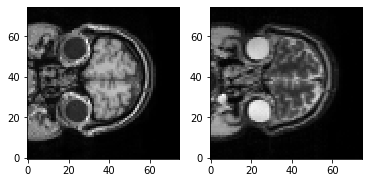

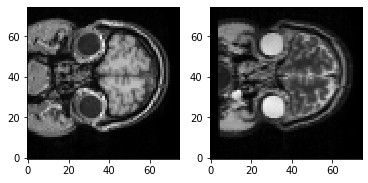

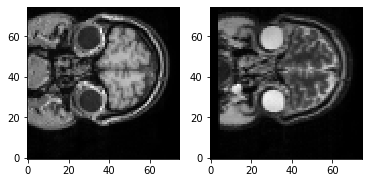

In [65]:
for i in range(len(my_dataset)):
    cropped_pair = my_dataset[i]
    show_slices(cropped_pair)
    
    if i > 5: break
    